In [137]:
%config IPCompleter.greedy=True
import pandas as pd
import pandas_profiling
import re
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv('../../data/twitter/twitter_data_cleaned.csv')

In [12]:
data.head()

,tweet_id,created_at,full_text,geo,coordinates,place,retweet_count,favorite_count,possibly_sensitive,lang,user_id
0,1.364223e+18,2021-02-23 14:38:16+00:00,Here’s what's in the COVID relief package:\n \...,NaN,NaN,NaN,9160,38093,NOT FOUND,en,2.950125e+07
1,1.364381e+18,2021-02-24 01:07:52+00:00,Will the National Endowment for the Arts be he...,NaN,NaN,NaN,6131,18560,NOT FOUND,en,1.201671e+18
2,1.364610e+18,2021-02-24 16:14:15+00:00,"This is both anecdotal and early, but many lon...",NaN,NaN,NaN,5941,63174,NOT FOUND,en,3.842872e+07
3,1.364727e+18,2021-02-24 23:59:58+00:00,A Link to Professor Chossudovsky’s Analysis of...,NaN,NaN,NaN,1,0,False,en,2.192010e+09
4,1.364727e+18,2021-02-24 23:59:58+00:00,Children warned over hugging grandparents even...,NaN,NaN,NaN,0,2,False,en,2.868190e+09


In [57]:
hashtag_regex = re.compile('#\S*(?:\s+|$)')

In [58]:
hashtag_regex.findall('test #foo #bar potato lorem #ipsum')

['#foo ', '#bar ', '#ipsum']

In [59]:
findHashtags = lambda x :hashtag_regex.findall(x)

In [64]:
data['hashtags'] = data.full_text.apply(findHashtags)

In [65]:
data.head()

,tweet_id,created_at,full_text,geo,coordinates,place,retweet_count,favorite_count,possibly_sensitive,lang,user_id,hashtags
0,1.364223e+18,2021-02-23 14:38:16+00:00,Here’s what's in the COVID relief package:\n \...,NaN,NaN,NaN,9160,38093,NOT FOUND,en,2.950125e+07,[]
1,1.364381e+18,2021-02-24 01:07:52+00:00,Will the National Endowment for the Arts be he...,NaN,NaN,NaN,6131,18560,NOT FOUND,en,1.201671e+18,[]
2,1.364610e+18,2021-02-24 16:14:15+00:00,"This is both anecdotal and early, but many lon...",NaN,NaN,NaN,5941,63174,NOT FOUND,en,3.842872e+07,[]
3,1.364727e+18,2021-02-24 23:59:58+00:00,A Link to Professor Chossudovsky’s Analysis of...,NaN,NaN,NaN,1,0,False,en,2.192010e+09,"[#Covid , #covidHOAX , #PLANdemic , #Event20..."
4,1.364727e+18,2021-02-24 23:59:58+00:00,Children warned over hugging grandparents even...,NaN,NaN,NaN,0,2,False,en,2.868190e+09,[]


In [82]:
checkifempty = lambda x : not x
tweet_with_hashtags = data[data['hashtags'].apply(checkifempty)]

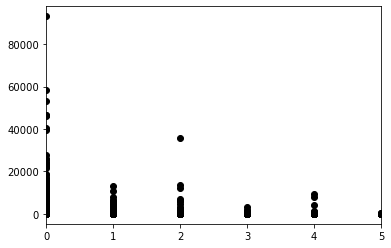

In [94]:
x = data['hashtags'].apply(lambda x: len(x))
y = data['retweet_count']
plt.xlim(0, 5);
plt.plot(x, y, 'o', color='black');



In [117]:
print(int(data.sort_values(['retweet_count'], ascending=False)['tweet_id'][0]))

1364223054851813376


In [118]:
print(int(data.sort_values(['retweet_count'], ascending=False)['user_id'][0]))

29501253


In [120]:
data.sort_values(['retweet_count'], ascending=False).head(10)

,tweet_id,created_at,full_text,geo,coordinates,place,retweet_count,favorite_count,possibly_sensitive,lang,user_id,hashtags
15852,1.366533e+18,2021-03-01 23:38:09+00:00,Hope everyone is alright! Had my wisdom teeth ...,NaN,NaN,NaN,93091,487769,NOT FOUND,en,8.427996e+07,[]
40046,1.366160e+18,2021-02-28 22:54:35+00:00,"I don’t care what Cruz said at CPAC, but I do ...",NaN,NaN,NaN,58256,386383,NOT FOUND,en,1.382031e+08,[]
23728,1.366783e+18,2021-03-02 16:08:56+00:00,RT @MILFWEEED: I think covid’s biggest lesson ...,NaN,NaN,NaN,52975,0,NOT FOUND,en,1.358817e+18,[]
27517,1.366787e+18,2021-03-02 16:28:22+00:00,RT @narendramodi: Took my first dose of the CO...,NaN,NaN,NaN,46778,0,NOT FOUND,en,1.294121e+18,[]
7377,1.366201e+18,2021-03-01 01:36:35+00:00,Took my first dose of the COVID-19 vaccine at ...,NaN,NaN,NaN,46738,226235,False,en,1.883978e+07,[]
15873,1.366777e+18,2021-03-02 15:48:23+00:00,RT @ScientistSwanda: Here I describe a brief o...,NaN,NaN,NaN,46202,0,NOT FOUND,en,1.128906e+09,[]
38696,1.366537e+18,2021-03-01 23:51:29+00:00,Just read up on @Shadow_Official . Very clever...,NaN,NaN,NaN,40463,309322,NOT FOUND,en,8.427996e+07,[]
38688,1.366493e+18,2021-03-01 20:59:59+00:00,If I don’t fucc with you I don’t mind you know...,NaN,NaN,NaN,39373,111978,NOT FOUND,en,8.164122e+17,[]
38691,1.366485e+18,2021-03-01 20:27:02+00:00,We’re excited to announce that GRAMMY-Nominate...,NaN,NaN,NaN,35694,99707,False,en,1.724321e+07,"[#BTS , #MusicOnAMission ]"
25518,1.365310e+18,2021-02-26 14:36:03+00:00,There’s already an epidemic of hatred towards ...,NaN,NaN,NaN,27969,53745,False,en,2.226802e+08,[]


In [132]:
data_sorted = data.sort_values(['retweet_count'], ascending=False).reset_index()

In [136]:
int(data_sorted['tweet_id'][3])

1366787475662729216

In [135]:
int(data_sorted['user_id'][3])

1294120557416345600